## Feladat 1 – Hálózati jellemzők és alapstatisztikák

Töltsd be a **Zachary’s Karate Club** hálózatot (`nx.karate_club_graph()`), és számítsd ki az alábbi alapvető mutatókat:

1. Csomópontok (node-ok) száma  
2. Élek (edge-ek) száma  
3. Átlagos fokszám (átlagos kapcsolatszám)  
4. A legmagasabb fokszámú tag neve (node indexe)

*Tipp:* Használd a `G.degree()` metódust, majd `sorted()` vagy `max()` függvényt az elemzéshez.  
*Kérdés:* Mit jelent a fokszám ebben a hálózatban szociológiai értelemben?


In [45]:
import networkx as nx
karate_network = nx.karate_club_graph()

In [46]:
import pandas as pd
import numpy as np

print(f"Csomópontok száma: {karate_network.number_of_nodes()}")
print(f"Élek száma: {karate_network.number_of_edges()}")

degree= dict(karate_network.degree())
avg_degree = sum(degree)/karate_network.number_of_nodes()


print(f"Átlagos fokszám: {avg_degree}")

max_node = max(degree,key=degree.get)

max_degree_id = degree[max_node]
print(f"Legmagasabb fokszámú csúcs: {max_degree_id}")

Csomópontok száma: 34
Élek száma: 78
Átlagos fokszám: 16.5
Legmagasabb fokszámú csúcs: 17


## Feladat 2 – Centralitás-mutatók összehasonlítása

Számítsd ki az alábbi **centralitásokat** a karate klub hálózaton:

- Degree centrality  
- Betweenness centrality  
- Closeness centrality  
- Eigenvector centrality

Készíts belőlük egy táblázatot (`pandas.DataFrame`) és **rendezd** a tagokat a legmagasabb érték szerint.

*Kiegészítő feladat:*  
Ábrázold a hálózatot úgy, hogy a csomópont **mérete** arányos legyen a degree centrality-vel,  
és **színe** a betweenness centrality-t tükrözze (pl. `plt.cm.Reds` skálával).
*Kérdés:* Kik a „híd” szereplők a klubban? Miért fontosak?


In [47]:
degree = nx.degree_centrality(karate_network)
betweenness = nx.betweenness_centrality(karate_network)
closeness = nx.closeness_centrality(karate_network)
eigenvector = nx.eigenvector_centrality(karate_network)


metrics = pd.DataFrame({
    "Degree": degree,
    "Betweenness": betweenness,
    "Closeness": closeness,
    "Eigenvector": eigenvector
}).round(3)

metrics.sort_values("Degree", ascending=False)

,Degree,Betweenness,Closeness,Eigenvector
33,0.515,0.304,0.550,0.373
0,0.485,0.438,0.569,0.355
32,0.364,0.145,0.516,0.309
2,0.303,0.144,0.559,0.317
1,0.273,0.054,0.485,0.266
3,0.182,0.012,0.465,0.211
31,0.182,0.138,0.541,0.191
23,0.152,0.018,0.393,0.150
8,0.152,0.056,0.516,0.227
13,0.152,0.046,0.516,0.226


## Feladat 3 – Közösségek detektálása

Használd a **Girvan–Newman** algoritmust a közösségek feltárására!


Közösség 1: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Közösség 2: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


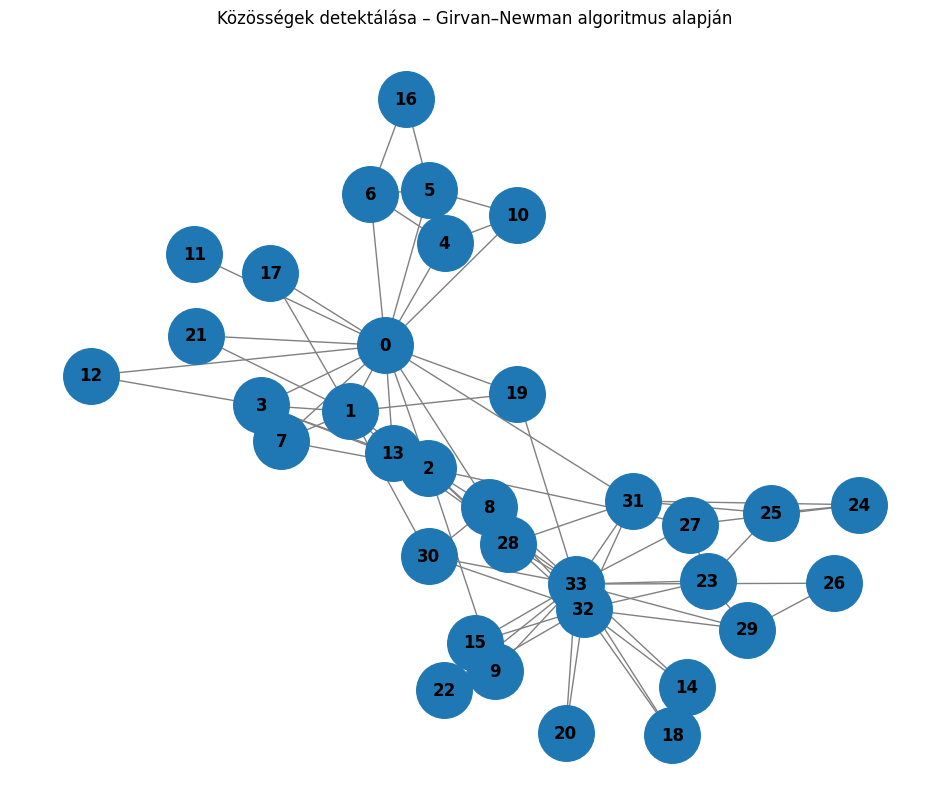

In [48]:
from networkx.algorithms.community import girvan_newman
import matplotlib.pyplot as plt

communities = next(girvan_newman(karate_network))

communities = [list(c) for c in communities]
for i, c in enumerate(communities):
    print(f"Közösség {i+1}: {c}")

import matplotlib.colors as mcolors

plt.figure(figsize=(12,10))
pos = nx.spring_layout(karate_network, seed=42)


nx.draw_networkx(
    karate_network, pos,
    with_labels=True,
    edge_color='gray',
    node_size=1600,
    font_weight='bold'
)
plt.title("Közösségek detektálása – Girvan–Newman algoritmus alapján")
plt.axis('off')
plt.show()

## Feladat 4

Írd ki az első 5 legbefolyásosabb személyt!


In [49]:
befoly = metrics.sort_values("Eigenvector", ascending=False)
befoly.head()

,Degree,Betweenness,Closeness,Eigenvector
33,0.515,0.304,0.550,0.373
0,0.485,0.438,0.569,0.355
2,0.303,0.144,0.559,0.317
32,0.364,0.145,0.516,0.309
1,0.273,0.054,0.485,0.266


## Feladat 5

Rajzold meg a hálózatot különböző színekkel a közösségek szerint.

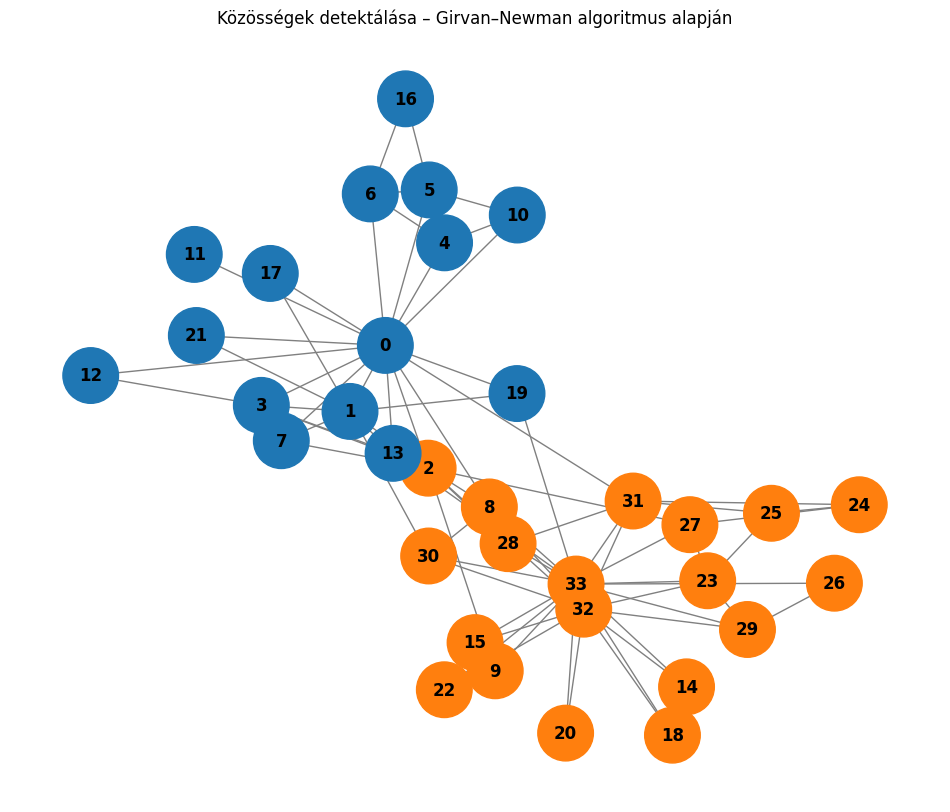

In [50]:
plt.figure(figsize=(12,10))
pos = nx.spring_layout(karate_network, seed=42)

colors = list(mcolors.TABLEAU_COLORS.keys())
node_colors = []
for n in karate_network.nodes():
    for i, c in enumerate(communities):
        if n in c:
            node_colors.append(colors[i % len(colors)])

nx.draw_networkx(
    karate_network, pos,
    with_labels=True,
    node_color=node_colors,
    edge_color='gray',
    node_size=1600,
    font_weight='bold'
)
plt.title("Közösségek detektálása – Girvan–Newman algoritmus alapján")
plt.axis('off')
plt.show()